In [2]:
import pyaudio
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack 
import time
from tkinter import TclError
%matplotlib inline

# constants
CHUNK = 1024 * 2             # how many audio samples per frame we display number of frames. Each frame is 2 bytes long, so you get 2048 bytes.
FORMAT = pyaudio.paInt16     # 16bit format per sample
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second [Hz] (common choice)
rec_time = 10                # recording time [seconds]
delay_time = 2               # time after which it starts recording [seconds]

# output file
filename = 'output.wav'


Process started
Start recording (after t=2s)
Finished recording
Recorded for 10 seconds


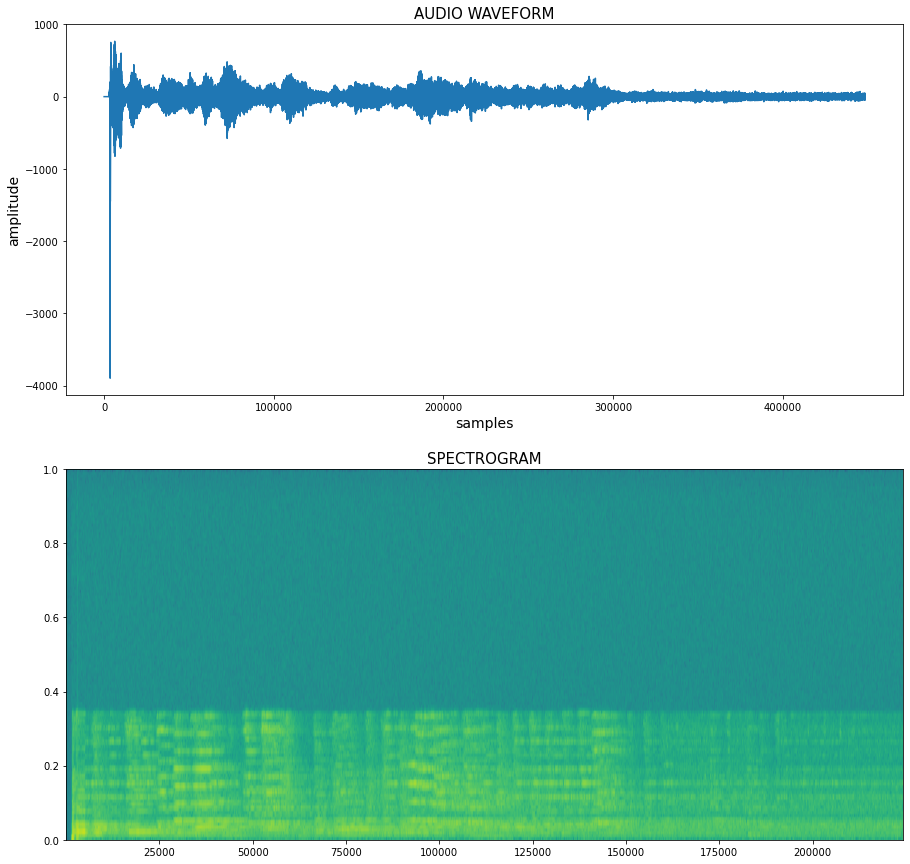

In [3]:
# create matplotlib figure and axes
fig, (ax0, ax1) = plt.subplots(2, figsize=(15, 15))

# pyaudio class instance
p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=CHUNK
)

# COLLECT AUDIO DATA
start_time = time.time()

# delay
print('Process started')
while True:
    current_time = time.time()
    elapsed_delaytime = current_time - start_time
    if elapsed_delaytime > delay_time: 
        break
    
# recording
print('Start recording (after t=%is)' %elapsed_delaytime)

frames = []
while True:
    current_time = time.time()
    elapsed_time = current_time - (start_time + delay_time)
    
    if elapsed_time > rec_time: 
        break
    
    # binary data
    data = stream.read(CHUNK)   # read 1 chunk at a time
    frames.append(data)
    
print('Finished recording')
print('Recorded for %i seconds' %elapsed_time)
stream.stop_stream()
stream.close()
p.terminate()  

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

# join the frames and plot the wavelength
amplitude = np.frombuffer(b''.join(frames), dtype=np.int16)

ax0.set_title('AUDIO WAVEFORM', fontsize=15)
ax0.set_xlabel('samples', fontsize=14)
ax0.set_ylabel('amplitude', fontsize=14)
ax0.plot(amplitude)

ax1.set_title('SPECTROGRAM', fontsize=15)
ax1.specgram(amplitude)
plt.show()
    

Peak frequency: 0.009358


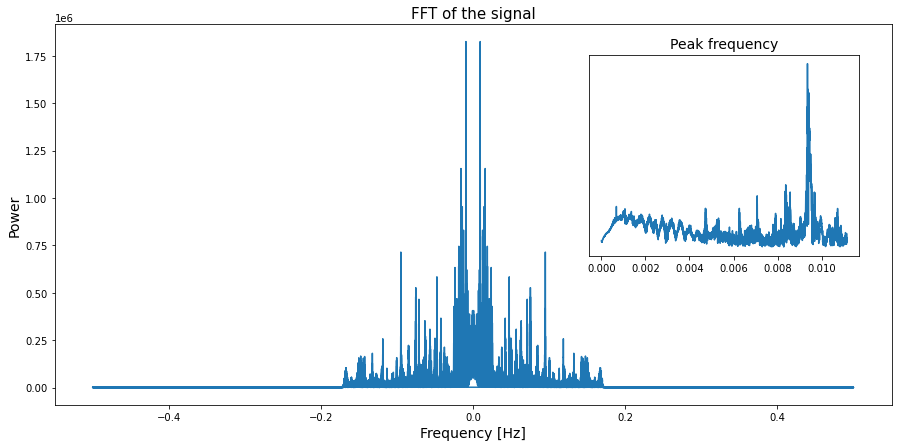

In [10]:
# FFT of the signal
sig_fft = fftpack.fft(amplitude)

# power (sig_fft is of complex dtype)
power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval

# return the corresponding frequencies
sample_freq = fftpack.fftfreq(amplitude.size)

# plot the FFT power
plt.figure(figsize=(15, 7))
plt.plot(sample_freq, power)
plt.title('FFT of the signal', fontsize=15)
plt.xlabel('Frequency [Hz]', fontsize=14)
plt.ylabel('Power', fontsize=14)

# find the peak frequency: focus only on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
pos_power = power[pos_mask]
# find the max of freqs array
peak_freq = freqs[pos_power.argmax()]
print("Peak frequency: %.6f" %peak_freq)

# inner plot to show the peak frequency
axes = plt.axes([0.62, 0.42, 0.25, 0.4])
plt.title('Peak frequency', fontsize=14)
plt.plot(freqs[:5000], pos_power[:5000])
plt.setp(axes, yticks=[]);

# scipy.signal.find_peaks_cwt can also be used for more advanced peak detection